# Using `detprocess`

This example notebook shows the expected usage for `detprocess` to process (triggered) raw data
and generate features (aka RQs) from the raw traces. 

The features can either be saved in hdf5 files
(default) OR  output to notebook (not both!). The features dataframe from hdf5 files must be loaded using vaex module directly or using 'detanalysis' (https://github.com/spice-herald/detanalysis) 

In [2]:
import detprocess as detp
import warnings
warnings.filterwarnings('ignore')

### Instantiate Processing object

We then need to specify two paths: 
   * the full path to the YAML file containing the processing setting
   * the full path to the 'group' folder (or list of hdf5 files) that contains the data saved by `pytesdaq` that will be loaded and processe. In addition, a list of series name (within the group) can be specified (optional)
 
   
**Optionally,**
   * a processing_id (string) can be specified, which is then turned into a feature. It is also used for group name and file name.  This is convenient to define a cut if multiple processings of the same raw data are done. 
   * an full path to an external feature extractor file can be provided and used **in addition** to be base extractor in detprocess

In [3]:
# configuration file
yaml_file = './process_example.yaml'

# raw data directory (or list of files)
raw_path = './example_I2_D20220915_T224645'
# optionally list of series to be processed, for example:
series = ['I2_D20220915_T230111']

# example of external file
external_file = './features_user.py'


# instrantiate
myproc = detp.Processing(raw_path, yaml_file, series=None, 
                        external_file=external_file, 
                        processing_id='testproc')


INFO: Found total of 1 files from 1 different series number!
INFO: External feature extractor = ./features_user.py
INFO: Filter file ./filter_example.hdf5 has been successfully loaded!


### Process

Let's now process data, saving HDF5 file

 * output base folder can be provided,  default same as group raw data
 * More than 1 core can be used if multiple series number within group (data are split between cores by series)

In [4]:
# start processing
myproc.process(nevents=-1, save_hdf5=True, output_path=None, ncores=1)

INFO: Processing output group path: ./testproc_feature_I2_D20230118_T194512
INFO: Instantiate OF base for each channel!
INFO: starting processing series I2_D20220915_T230111
INFO: Feature processing done!


###  Feature data check (replace processing path with above output folder) 

Here we just check data using 'detanalysis' package. 

Analysis example 
in https://github.com/spice-herald/detanalysis/tree/master/demos

Number of files: 1
Number of events: 87
Number of features: 39
Is DataFrame filtered? False


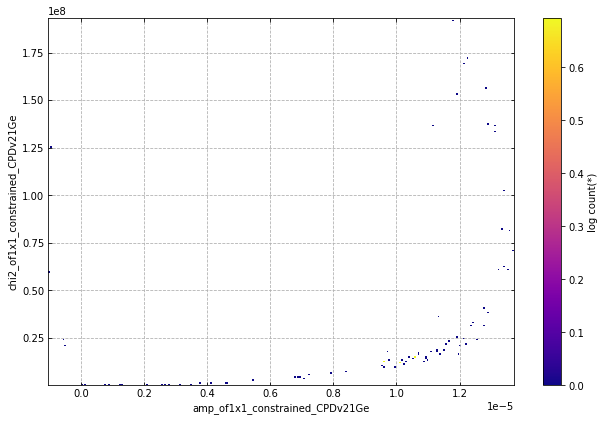

In [5]:
# import deteanalysis
from detanalysis import Analyzer

# Instantiate analyzer (REPLACE path with your newly processed data )
myanalyzer = Analyzer('./testproc_feature_I2_D20230118_T194512', series=None)


# display informations and dataframe
myanalyzer.describe()
myanalyzer.df

# plot
fig, ax = myanalyzer.heatmap('amp_of1x1_constrained_CPDv21Ge','chi2_of1x1_constrained_CPDv21Ge')

### Noise File 

Let's take a look at the noise file that was used for processing

Filter file: ./filter_example.hdf5:

/IrPtTESSmall+IrPtTESBig/psd: pandas.Series (25000,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall+IrPtTESBig/psd_fold_total: pandas.Series (12501,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall+IrPtTESBig/template: pandas.Series (25000,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall|IrPtTESBig/psd: pandas.Series (25000,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall|IrPtTESBig/psd_fold: pandas.Series (12501,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall|IrPtTESBig/template: pandas.Series (25000,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall/psd: pandas.Series (25000,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall/psd_fold: pandas.Series (12501,), metadata: {'version': 23, 'comment': 'just a comment'}
/IrPtTESSmall/template: pandas.Series (25000,), metadata: {'version': 23, 'comment

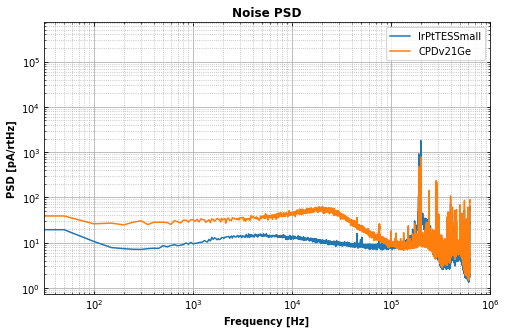

In [6]:
# import pytesdaq filter file reader
from pytesdaq.io import FilterH5IO

# instantiate
myfilter = FilterH5IO('./filter_example.hdf5')


# check what is in there...
myfilter.describe()


# plot noise PSD IrPt and CPD 
myfilter.plot_psd(['IrPtTESSmall','CPDv21Ge'], fold=True)